In [3]:
import numpy as np
from numpy.linalg import norm, det
from numpy import arccos, dot
from scipy.linalg import lu
import matplotlib.pyplot as plt

# Linear Algebra

To start the math unit, I am going to tackle my largest gap in knowledge: Linear Algebra. I attempted to take Linear Algebra but dropped the class. Luckily, my book https://pythonnumericalmethods.berkeley.edu/notebooks/chapter14.00-Linear-Algebra-and-Systems-of-Linear-Equations.html has a chapter dedicated to talking about it.

I intend to just work my way through the chapters and take notes as I go.

## Vectors
Vectors are a 1 dimensional, n-long set of real numbers. Alternatively, they can be stated to be an n-tuple of the set of real numbers.

Unless stated, you can assume that a vector is a column vector. 

You can transpose a vector to swap its major order i.e. turn a row vector into a column vector.

In [7]:
vec_row = np.array([[1,2,3,4,5]])
vec_col = np.array([[6],
                  [7],
                  [8],
                  [9],
                  [10]])
vec_col_diff = np.array([1,2,3,4,5])
print(vec_row.shape)
print(vec_col.shape)
print(vec_col_diff.shape)

(1, 5)
(5, 1)
(5,)


It is worth noting that the row vector has a shape of 1 x N, and the column vector has a shape of N x 1.

vec_col_diff is worth pointing out because of its resemblance to vec_col,  but its shape is not the same.


## Norms
Norms are all basically length calculations, but depending on what type of norm they are, they have different behaviors.

L2 norms are the ones most understandable as they are basically euclidean distance.
They're computed with this formula: 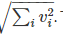

L1 norms are based off of straight lines. It's sometimes called Manhattan distance or taxicab distance. Here is its formula: 

As a final note, here is an image showing the difference:
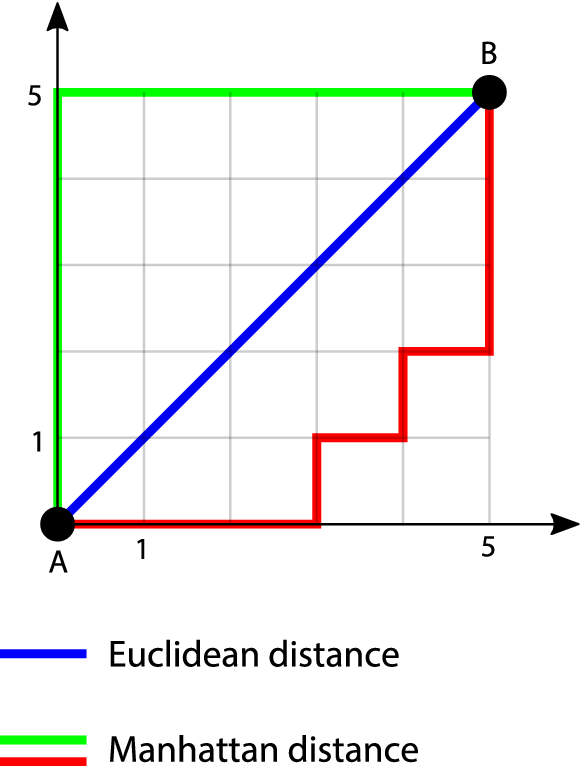


There is also the L (inf) which is equal to the maximum absolute value in the vector

Numpy allows the user to do these normalization methods through the **norm** function from **numpy.linalg**

In [10]:
# Simple case, using the graph above
vector = np.array([5,5])
l1 = norm(vector,1)
l2 = norm(vector,2)

print("L1:",l1,"\nL2",l2)

L1: 10.0 
L2 7.0710678118654755


# Vector Operations
## Vector Addition 
Achieved with just piece wise addition of each element in the vectors.i.e. <1,2,3>+<1,2,3>=<2,4,6>

## Multiplication
Multiplication is a bit more obscure as it has multiple definitions on how it can be done.

### Scalar Multiplication
This is the easiest multiplication in my eyes. Say you have a scalar value like 3 and a vector <2,4,6>. The result of scalar multiplication would be 3\*2 + 3 \*4 + 6\*3 = 36

### Dot Product Multiplication
Dot product is simple as well. You multiply each element of the two equally sized arrays and then add them up. Here's a general formula 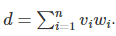

You can determine the angle between two vectors using this formula (which involves the dot product)


I never really had this explanation of what a dot product is, but my book defines them as "measure of how similarly directed the two vectors are".


In [26]:

v = np.array([[3, 3]])
w = np.array([[2, 2]]) # These lines are parallel
theta =arccos(dot(v,w.T)/(norm(v)*norm(w))) #  the .T transpose the array
print(theta)

v = np.array([[-2,2]]) # perpendiculat
theta =arccos(dot(v,w.T)/(norm(v)*norm(w))) #  the .T transpose the array
print(theta)

[[0.]]
[[1.57079633]]


## Cross Products
A cross product geometrically represents a vector perpendicular to the two vectors with length equal to the area enclosed by the parallelogram created by the two vectors.
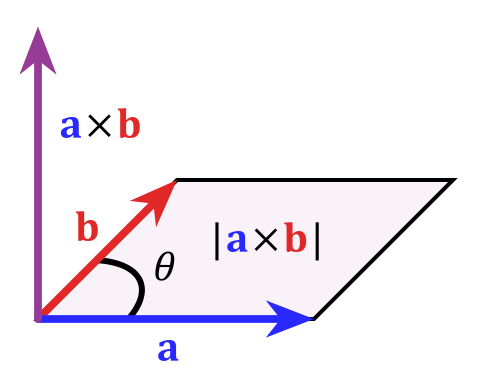


You can calculate them two ways that I know of:
They were always confusing to me if solved using this formula: 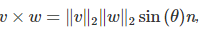

I've always preferred using the method where you take the determinants of a matrix instead (definitely not my handwriting) :
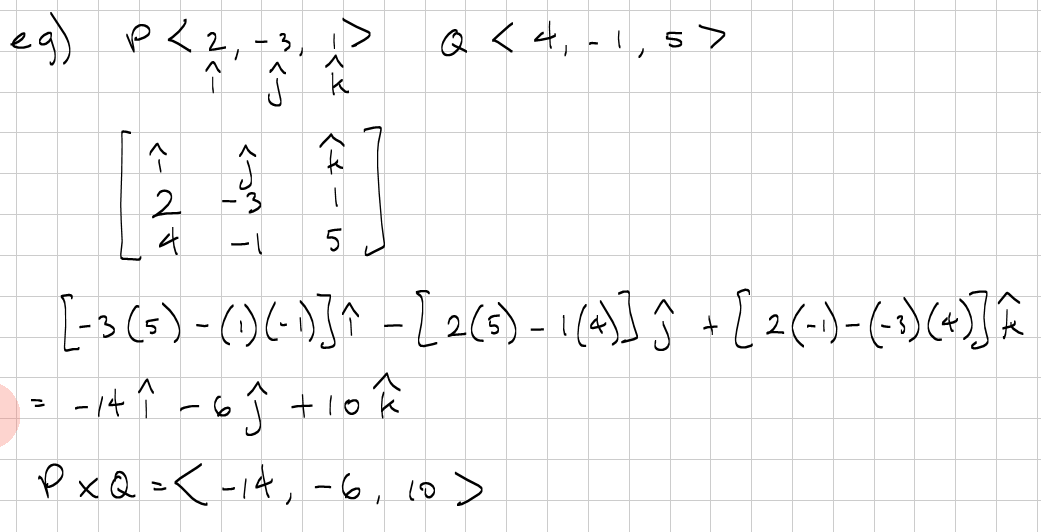

In [27]:
v = np.array([[0, 2, 0]])
w = np.array([[3, 0, 0]])
print(np.cross(v, w))

[[ 0  0 -6]]


# Matrices

## Matrix Terminology
Matrix mulitplication is defined when P is m x p and Q is a p x n, and M=PQ which is of dimension m x n. 

p is defined as the **inner matrix dimension** q is defined as the **outer matrix dimensions**.

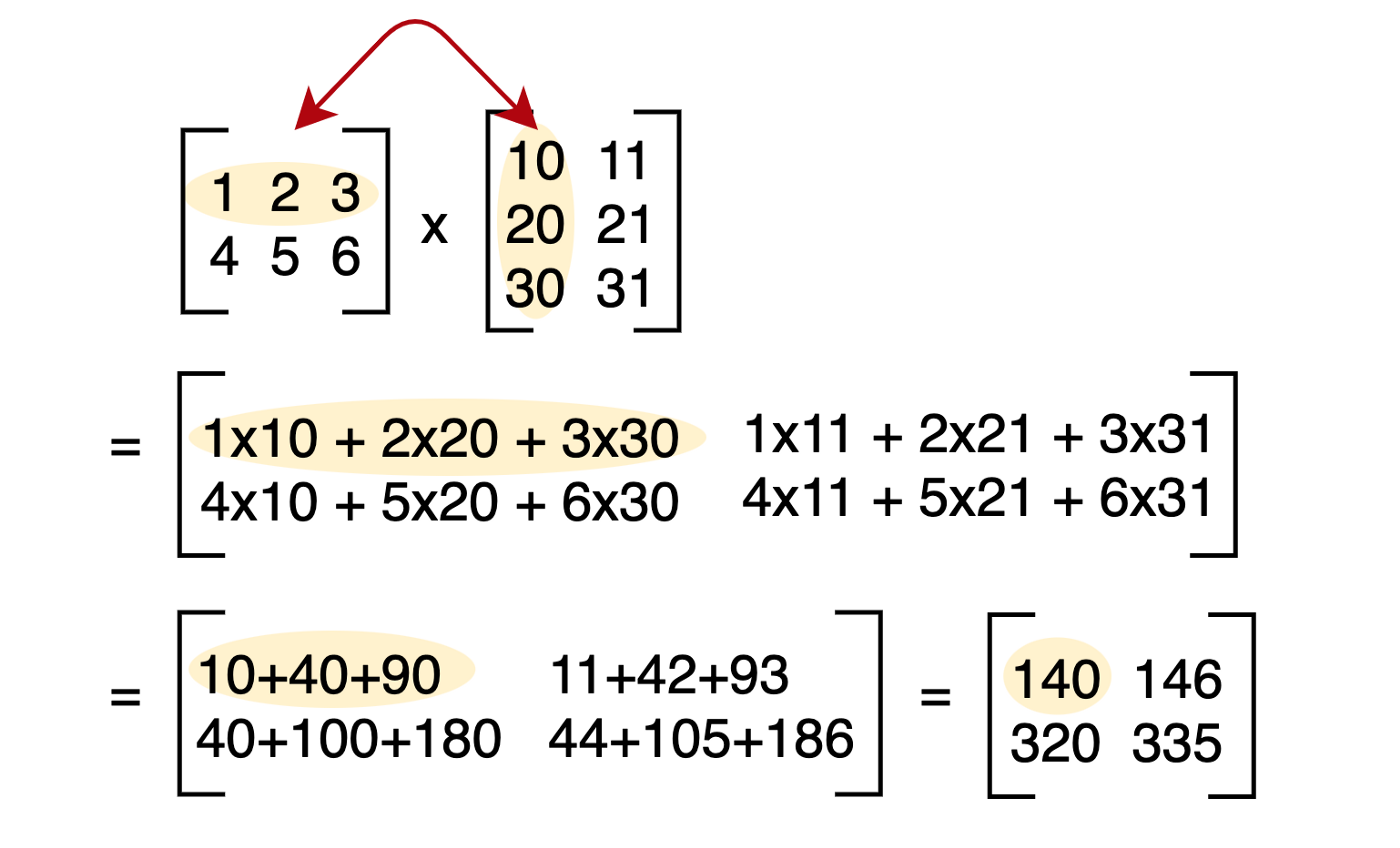

The type of multiplication in numpy depends on the method used. np.dot will do matrix multiplication, while * will attempt to do piece by piece scalar multiplication.

**Note to self: Remember that matrix multiplication is essentially just a dot product of each row by each column**

In [34]:
P = np.array([[1, 7], [2, 3], [5, 0]])
Q = np.array([[2, 6, 3, 1], [1, 2, 3, 4]])
print(P)
print(Q)
print("Matrix multiplication",np.dot(P, Q))


[[1 7]
 [2 3]
 [5 0]]
[[2 6 3 1]
 [1 2 3 4]]
Matrix multiplication [[ 9 20 24 29]
 [ 7 18 15 14]
 [10 30 15  5]]


In [35]:
# Won't work because * is just piece wise multiplication
res = P * Q

ValueError: operands could not be broadcast together with shapes (3,2) (2,4) 

In [36]:
# Will work...effectively just squaring
res = P*P
res

array([[ 1, 49],
       [ 4,  9],
       [25,  0]])

## Transpose
The **Transpose** of a matrix is basically a matrix that has reversed the positions of its rows and its columns. If you transpose a matrix, you essentially turn it from being a row based matrix to a column based one, or vice versa

You can use .T method of a numpy array to quickly get its Transpose.

This seems like it would be very useful to know if I am working with linking Python to Fortran code

In [4]:
P = np.array([[1, 7], [2, 3], [5, 0]])
Q = np.array([[2, 6, 3, 1], [1, 2, 3, 4]])
print(P)
print(Q)
print("Transposing the matrices...")
print(P.T) 
print(Q.T)

[[1 7]
 [2 3]
 [5 0]]
[[2 6 3 1]
 [1 2 3 4]]
Transposing the matrices...
[[1 2 5]
 [7 3 0]]
[[2 1]
 [6 2]
 [3 3]
 [1 4]]


## Determinant


I've never quite understood "what" a determinant represents, but I've calculated them before. I know it will only work for a square matrix. As a refresher, here is the formula:
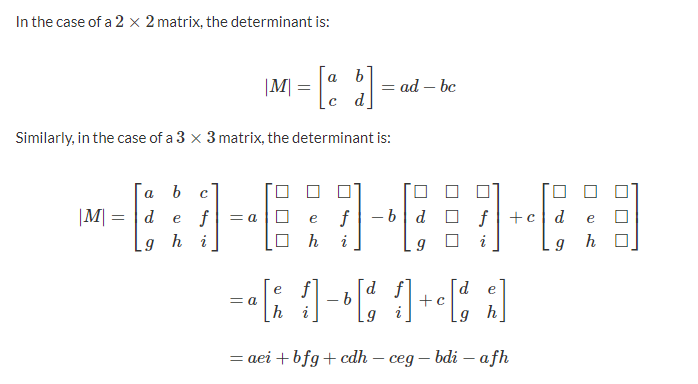

A few properties of the determinant: 
* !=0 means it is an invertible matrix
* The determinant of a product of matrices is the product of their determinants
* They show up in complex math like Jacobian Matrices

Another example:
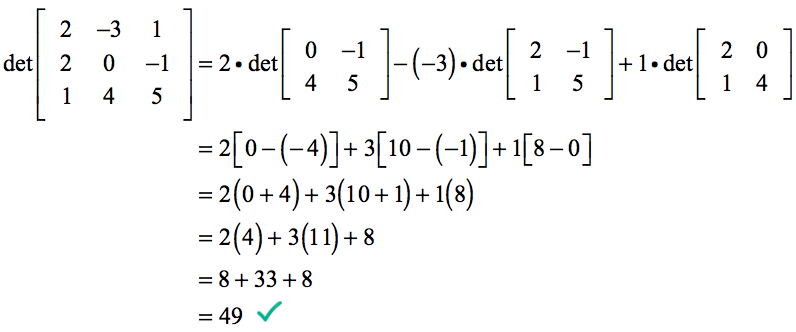


In [6]:
# Same as above
P = np.array([[2,-3,1], [2,0,-1], [1,4,5]])
print(det(P))

49.000000000000014


## Row Echelon Form Matrix
There are two pieces that must be met for a matrix to be in row echelon form (wikipedia):

* All rows consisting of only zeroes are at the bottom
* The leading coefficient (also called the pivot) of a nonzero row is always strictly to the right of the leading coefficient of the row above it.

It basically looks like this:
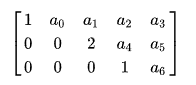

## Matrix Inverse
The inverse of a square matrix M is a matrix of the same size, N, such that M⋅N=I. 

The inverse of a matrix is analagous to the inverse of real numbers. For example, the inverse of 3 is 1/3 because (3)(1/3)=1.

You can check if a matrix has an inverse by taking its determinant. If it equals zero, the matrix is **non-invertible**.

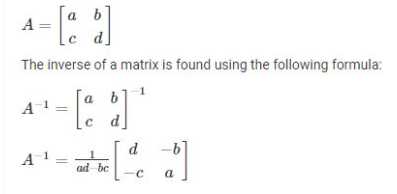

This is just for the 2 X 2 matrix case, but the 3 X 3 matrix case gets a bit more complicated:
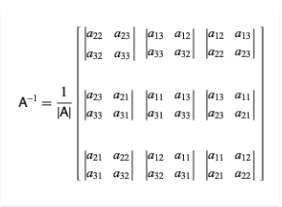

<br>
As you can see, that's a lot of determinants. The other option is to use row operations.
<br>

You can call this python code in order to calculate the inverse of the matrix. Under the hood it's calling a LAPACK routine gesv to solve for the inverse A·A^1 = I where I is the identity matrix. This routine will come up later.


In [16]:
A= np.array([[2,1],[7,4]])
inverse= np.linalg.inv(A)
inverse

array([[ 4., -1.],
       [-7.,  2.]])

# Linear Equations

As seen in Module 1, you can convert a system of equations into a "*matrix form*".
This alternate representation allows for performing mathematical operations in terms of the matrices. e.g. elementary row operations.

### Elementary Row Operations
There are three elementary row operations: 
* Row Swap
* Scalar Multiplication
* Row Sum

Row swapping is quite easy to understand. You just take two rows of a matrix and swap their positions.
    <br/> Usually denoted by something like R1 <-> R3
    
Scalar Multiplication is taking a given row and multiplying it by the same value. 
    <br/> e.g. notation: 3R1
    
Row Sum takes two rows and sums them into one row. Only one of the rows are affected i.e.if you add row 1 to row 3, only row 3 is changed
    <br/> e.g. R1 = R1 + R3
    
I will use this matrix for my coding examples:
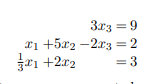

For clarity sake, when I saw Row 1, that is actually the first row. Not using zero indexing

In [13]:
matrix = np.array([[0,0,3,9],[1,5,-2,2],[1/3,2,0,3]])
matrix

array([[ 0.        ,  0.        ,  3.        ,  9.        ],
       [ 1.        ,  5.        , -2.        ,  2.        ],
       [ 0.33333333,  2.        ,  0.        ,  3.        ]])

### Row Swap

In [14]:
# Row Swap, R1<->R3
matrix[[2,0]]=matrix[[0,2]]
matrix

array([[ 0.33333333,  2.        ,  0.        ,  3.        ],
       [ 1.        ,  5.        , -2.        ,  2.        ],
       [ 0.        ,  0.        ,  3.        ,  9.        ]])

a[[0, 2]] is shorthand for a[[0, 2], :].
The colon indicates all elements, and the 0,2 is saying I want rows 0, and 2

Here's a stack overflow article that got me started:
https://stackoverflow.com/questions/22927181/selecting-specific-rows-and-columns-from-numpy-array

It is worth noting that if you wanted to swap the columns of a matrix, you could do something like this (basically the same thing but backwards):

In [16]:
matrix[:,[2,0]]=matrix[:,[0,2]]
matrix

array([[ 0.        ,  2.        ,  0.33333333,  3.        ],
       [-2.        ,  5.        ,  1.        ,  2.        ],
       [ 3.        ,  0.        ,  0.        ,  9.        ]])

### Scalar Multiplication
Syntax is easier to understand than the previous example

In [26]:
# Reset
matrix = np.array([[0,0,3,9],[1,5,-2,2],[1/3,2,0,3]])
matrix

array([[ 0.        ,  0.        ,  3.        ,  9.        ],
       [ 1.        ,  5.        , -2.        ,  2.        ],
       [ 0.33333333,  2.        ,  0.        ,  3.        ]])

In [27]:
# 2*R3, vv easy syntax but dangerous because it will keep doing it in place [dont rerun cell]
matrix[[2]]*=2
matrix

array([[ 0.        ,  0.        ,  3.        ,  9.        ],
       [ 1.        ,  5.        , -2.        ,  2.        ],
       [ 0.66666667,  4.        ,  0.        ,  6.        ]])

### Row Summation
Syntax is like a child of the previous two

In [ ]:
# Reset
matrix = np.array([[0,0,3,9],[1,5,-2,2],[1/3,2,0,3]])
matrix

In [28]:
# R1=R1+R3
matrix[[0]]+=matrix[[2]]
matrix

array([[ 0.66666667,  4.        ,  3.        , 15.        ],
       [ 1.        ,  5.        , -2.        ,  2.        ],
       [ 0.66666667,  4.        ,  0.        ,  6.        ]])

As you can expect, Numpy makes it very easy to perform these operations with its slicing syntax. It's very nice in that regard

## Solving Linear Equations
First I need to talk about the various cases of solutions for systems of linear equations. There are three cases:

* Case 1: There is no solution for x
* Case 2: There is a unique solution for x
* Case 3: There is an infinite number of solutions for x
 
where x is a tuple of values that serve as a solution for the matrix form.

<br/>

Knowing the *rank* of the matrix usually helps narrow down the case.

**Rank**: the maximum number of linearly independent column vectors in the matrix, or the number of linearly independent row vectors in the matrix [either one can be used].

**linearly independent**:  if no vector in the set is (a) a scalar multiple of another vector in the set or (b) a linear combination of other vectors in the set


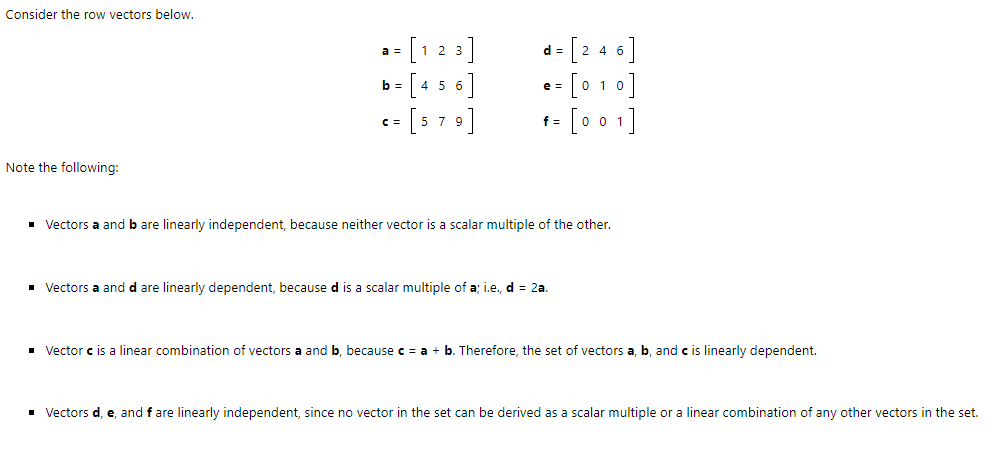

<br/>

To find the rank, it helps to find the reduced row echelon form of a matrix. There exists no possible solution 

### No Solutions
If the rank of the "Y" column of the matrix is equal to the rank of A plus 1, then there are no solutions. In other words, if y is linearly independent from the columns of A, Y is not in the range of A and by definition cannot have a solution.

This is usually because the matrix is 'inconsistent'
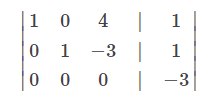

Notice that there exists no operation you can perform on the columns of A to reach the Y column vector

### One Solution
If the rank of the "Y" column of the matrix is equal to the rank of A then there is exactly one solution. 
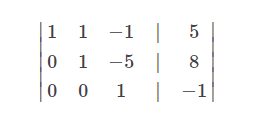

### Infinite Number of Solutions
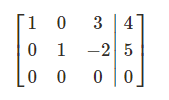
This particular matrix has an infinite number of solutions because the rank (the number of independent row vectors i.e. the number of non zero rows of the echelon matrix is less than the number of unknowns) is less than the unknowns

2 rows < 3 unknowns

## Solving Systems
I am already familiar with Guassian Elimination, but the one that I needed to get some refreshers on was the Gauss-Jordan Elimination Method. I understand now that the major difference is that Gauss-Jordan Elimination goes until the A matrix turns into a 1 diagonal form i.e.
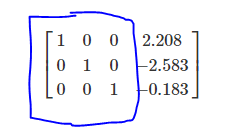

### LU Decomposition
This one took some reading to understand. I'm under the impression that you seperate a parent matrix into two pieces, and the pieces themselves when multiplied together are the starting matrix. You can use the L and U components to solve your system of equations by forward and backward substitution


Below is the general format of what this looks like
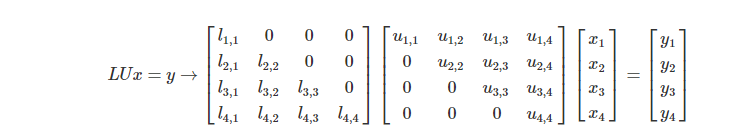

This is the matrix we are breaking into two components:
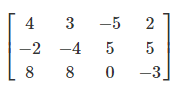



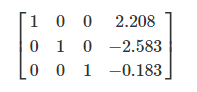

I worked this out by hand to get a feel for how it worked. I basically took each L and U matrix part and put them in terms of multiplication to get the resulting matrix A. You can see that later I make a system of equations to solve for each L and U sub item:
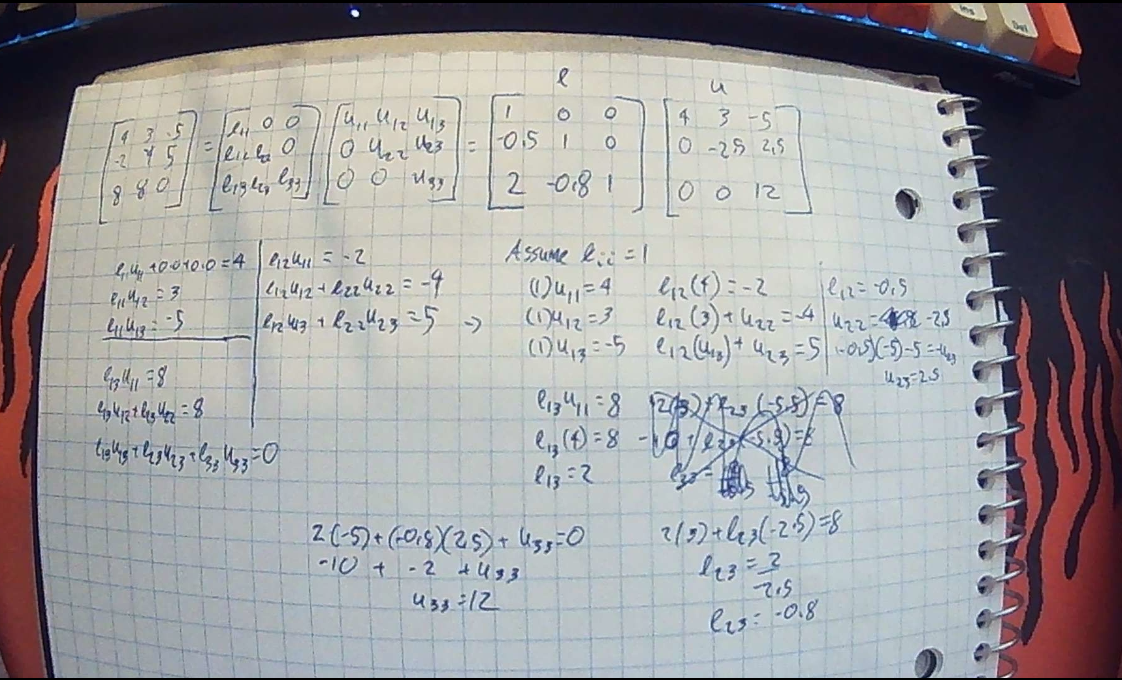


This is only the first half. That only solves for the LU components and doesn't solve for the variables for the system.
This part [that I also worked out by hand] does that part.
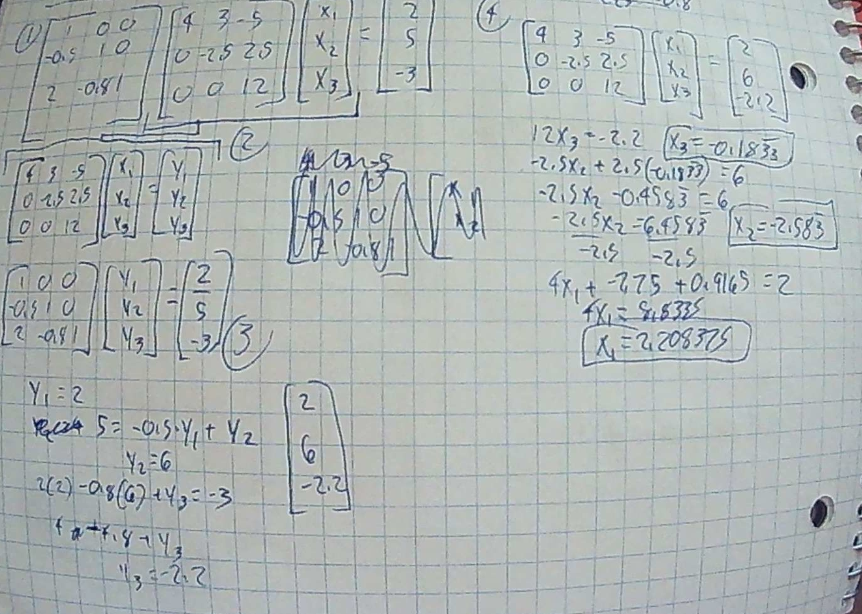

As you can see, I did end up getting the expected solution. You may be thinking, why on Earth would you ever want to use an LU decomposition to solve for equations. That is a simple answer: notice that I do not have to change my starting matrix in order to solve for a given solution. I just change my column vector \[2 5 -3\] to the right of one and then redo the substitution. If I have the LU component, this means I can perform Ax=B solutions much faster and much more efficiently because I am not having to remake my matrix for each different B part.

Here is some code for quick decomposition. It's worth noting that numpy's permutation matrix is backwards from mine i.e. their matrix diagonal starts from the bottom left instead of the upper left. This causes the L and U decomps to be a bit different:

In [13]:
# same matrix
A = np.array([[4,3,-5],[-2,-4,5],[8,8,0]])

# borrowed from scipy.linalg
P, L, U= lu(A)
print(P)
print(L)
print(U)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [-0.25  1.    0.  ]
 [ 0.5   0.5   1.  ]]
[[ 8.   8.   0. ]
 [ 0.  -2.   5. ]
 [ 0.   0.  -7.5]]


### Solving With Computers Because it's 2022
For General Solving of Equations, one can use the np.linalg.solve function which takes these parameters:

np.linalg.solve(Matrix of Equation Coefficients, solution vector)

Under the hood, the solve routine is using a LAPACK routine called \_gesv which has a few variants. After reading a few different documentation pages about it, I read it is indeed using an LU decomposition. I had heard it pop up in a few circumstances so that's why I made a point to read about it.

* https://ww2.lacan.upc.edu/doc/intel/mkl/mkl_manual/lle/functn_gesv.htm
* http://www.netlib.org/lapack/explore-html/d0/db8/group__real_g_esolve_ga3b05fb3999b3d7351cb3101a1fd28e78.html#ga3b05fb3999b3d7351cb3101a1fd28e78 - one variant, sgesv
* https://www.intel.com/content/www/us/en/develop/documentation/onemkl-developer-reference-fortran/top/lapack-routines/lapack-linear-equation-routines/lapack-linear-equation-driver-routines/gesv.html - Intel documentation

In [14]:
A = np.array([[4,3,-5],[-2,-4,5],[8,8,0]])
Y=[2,5,-3]
x = np.linalg.solve(A,Y)
x

array([ 2.20833333, -2.58333333, -0.18333333])

There's another set of methods for solving systems of equations that are called iterative methods, but my book only covers one of note: that is the Gauss Seidel Method. I would cover this, but I think implementing it would actually be a nice task for when I learn Julia. I am going to save it for then.

With that, I feel like this Linear Algebra notebook is a good start. I probably would have done well to throw in Eigenvalues, but I haven't really seen those pop up in my job too often like the others.